# Wine Quality Prediction using Deep Neural Networks

In [15]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv('QualityPrediction.csv')

In [17]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)

In [20]:
train.shape

(1119, 12)

In [21]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
52,6.6,0.50,0.04,2.1,0.068,6.0,14.0,0.99550,3.39,0.64,9.4,6
1299,7.6,1.58,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3
963,8.8,0.27,0.39,2.0,0.100,20.0,27.0,0.99546,3.15,0.69,11.2,6
784,7.1,0.59,0.01,2.5,0.077,20.0,85.0,0.99746,3.55,0.59,9.8,5
1326,6.7,0.46,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6


In [22]:
test.shape

(480, 12)

In [24]:
train_x = train.drop('quality', axis=1)
train_y = train['quality']
# train_x=(train_x-train_x.min())/(train_x.max()-train_x.min())

test_x = test.drop('quality', axis=1)
test_y = test['quality']

In [25]:
train_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
52,6.6,0.50,0.04,2.1,0.068,6.0,14.0,0.99550,3.39,0.64,9.4
1299,7.6,1.58,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9
963,8.8,0.27,0.39,2.0,0.100,20.0,27.0,0.99546,3.15,0.69,11.2
784,7.1,0.59,0.01,2.5,0.077,20.0,85.0,0.99746,3.55,0.59,9.8
1326,6.7,0.46,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6


In [26]:
no_features = train_x.shape[1]
no_features

11

In [27]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=64,activation='relu',input_shape=[no_features]),
                             tf.keras.layers.Dense(units=64,activation='relu'),
                             tf.keras.layers.Dense(units=1)])

In [30]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [34]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs['loss'] < 0.35:
            print("MSE less than 0.35. No futher training required. Otherwise \
                  data will overfit")
            self.model.stop_training = True

In [37]:
callbacks = MyCallback()

In [40]:
history = model.fit(train_x,train_y,epochs=50,callbacks=[callbacks])

Epoch 1/50
35/35 [==============================] - 0s 756us/step - loss: 0.5080 - mae: 0.5559
Epoch 2/50
35/35 [==============================] - 0s 1ms/step - loss: 0.5172 - mae: 0.5644
Epoch 3/50
35/35 [==============================] - 0s 1ms/step - loss: 0.5225 - mae: 0.5654
Epoch 4/50
35/35 [==============================] - 0s 974us/step - loss: 0.4697 - mae: 0.5323
Epoch 5/50
35/35 [==============================] - 0s 1ms/step - loss: 0.4902 - mae: 0.5474
Epoch 6/50
35/35 [==============================] - 0s 1ms/step - loss: 0.4904 - mae: 0.5530
Epoch 7/50
35/35 [==============================] - 0s 1ms/step - loss: 0.5025 - mae: 0.5557
Epoch 8/50
35/35 [==============================] - 0s 878us/step - loss: 0.4817 - mae: 0.5414
Epoch 9/50
35/35 [==============================] - 0s 1ms/step - loss: 0.4722 - mae: 0.5363
Epoch 10/50
35/35 [==============================] - 0s 931us/step - loss: 0.4708 - mae: 0.5317
Epoch 11/50
35/35 [==============================] - 0s 858us

Text(0.5, 0, 'Epochs')

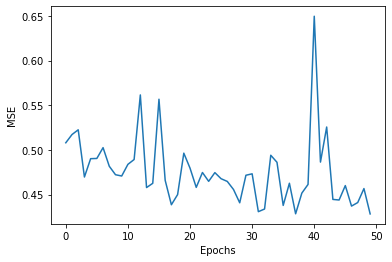

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history['loss'])
plt.ylabel('MSE')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

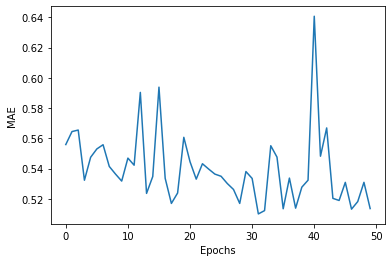

In [43]:
plt.plot(history.epoch, history.history['mae'])
plt.ylabel('MAE')
plt.xlabel('Epochs')

In [44]:
test_mse, test_mae = model.evaluate(test_x, test_y)

15/15 [==============================] - 0s 709us/step - loss: 0.4308 - mae: 0.5100


In [45]:
predict = model.predict(test_x)
for i in range(predict.shape[0]):
  predict[i][0] = int(predict[i][0])
sum = 0
test_y=list(test_y)
for i in range(predict.shape[0]):
  if (predict[i][0] == test_y[i]):
    sum += 1
print((sum/predict.shape[0])*100)

35.625
